In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [ ]:

df = pd.read_csv('/content/creditos-ativos.csv', sep=';')

In [ ]:
paleta_cores_suaves = {
    'Azul_claro': '#A8DADC',  # Azul Claro
    'off_white': '#F1FAEE',  # Off-white
    'Azul_medio': '#457B9D',  # Azul Médio
    'pessego_claro': '#F1D1B5',  # Pêssego Claro
    'verde_agua': '#2A9D8F',  # Verde Água
    'amarelo_claro': '#E9C46A',  # Amarelo Claro
    'rosa_claro': '#D4A5A5',  # Rosa Claro
    'laranja_claro': '#F4A261',  # Laranja Claro
    'verde_claro': '#A4C2A3',  # Verde Claro
    'bege': '#F4F1BB',  # Bege
    'roxo_claro': '#B8A9C9',  # Roxo Claro
    'salmão': '#F2A7B2',  # Salmão
    'cinza_claro': '#E3E3E3',  # Cinza Claro
    'amarelo_escuro': '#D49F00',  # Amarelo Escuro
    'verde_oliva': '#606C38',  # Verde Oliva
    'roxo_escuro': '#6A4C9C',  # Roxo Escuro
}

**Dicionario dos Dados: https://arquivos.receitafederal.gov.br/dados/creditos-ativos/Cr%C3%A9ditos%20Ativos%20-%20Metadados.pdf**

In [ ]:
df.shape

(917398, 9)

In [ ]:
df

,ano_mes,situacao,tipo_contribuinte,cnae_secao_cod,cnae_secao_descr,nat_juridica,uf,grupo_tributo,vl_total
0,2025-02,DEVEDOR,PF,NaN,NaN,NaN,AC,CONTRIB. PREV.,"3817898,98"
1,2025-02,DEVEDOR,PF,NaN,NaN,NaN,AC,IRPF,"72753845,67"
2,2025-02,DEVEDOR,PF,NaN,NaN,NaN,AC,IRRF,"48302,49"
3,2025-02,DEVEDOR,PF,NaN,NaN,NaN,AC,ITR,"134242029,5"
4,2025-02,DEVEDOR,PF,NaN,NaN,NaN,AC,MULTAS,"1069025,26"
...,...,...,...,...,...,...,...,...,...
917393,2024-01,PARCELADO,PJ,U,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,SOCIEDADE EMPRESÁRIA LIMITADA,SP,CONTRIB. PREV.,"2291239,73"
917394,2024-01,PARCELADO,PJ,U,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,SOCIEDADE EMPRESÁRIA LIMITADA,SP,CSLL,"797731,09"
917395,2024-01,PARCELADO,PJ,U,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,SOCIEDADE EMPRESÁRIA LIMITADA,SP,IRPJ,"1447207,45"
917396,2024-01,PARCELADO,PJ,U,ORGANISMOS INTERNACIONAIS E OUTRAS INSTITUIÇÕE...,SOCIEDADE EMPRESÁRIA LIMITADA,SP,IRRF,"265791,7"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917398 entries, 0 to 917397
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ano_mes            917398 non-null  object
 1   situacao           917398 non-null  object
 2   tipo_contribuinte  917398 non-null  object
 3   cnae_secao_cod     896080 non-null  object
 4   cnae_secao_descr   896080 non-null  object
 5   nat_juridica       905439 non-null  object
 6   uf                 917298 non-null  object
 7   grupo_tributo      917398 non-null  object
 8   vl_total           917398 non-null  object
dtypes: object(9)
memory usage: 63.0+ MB


In [ ]:
df = df.drop(['cnae_secao_cod', 'cnae_secao_descr', 'nat_juridica'], axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917298 entries, 0 to 917397
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ano_mes            917298 non-null  object
 1   situacao           917298 non-null  object
 2   tipo_contribuinte  917298 non-null  object
 3   uf                 917298 non-null  object
 4   grupo_tributo      917298 non-null  object
 5   vl_total           917298 non-null  object
dtypes: object(6)
memory usage: 49.0+ MB


In [ ]:
df.describe()

,ano_mes,situacao,tipo_contribuinte,uf,grupo_tributo,vl_total
count,917298,917298,917298,917298,917298,917298
unique,14,4,2,28,20,836322
top,2024-12,DEVEDOR,PJ,SP,MULTAS,250
freq,66603,382119,905439,77378,135997,2211


In [ ]:
df.dtypes

,0
ano_mes,object
situacao,object
tipo_contribuinte,object
uf,object
grupo_tributo,object
vl_total,object


In [ ]:
df['vl_total'] = (
    df['vl_total']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

In [ ]:
df.dtypes

,0
ano_mes,object
situacao,object
tipo_contribuinte,object
uf,object
grupo_tributo,object
vl_total,float64


In [ ]:
df.columns

Index(['ano_mes', 'situacao', 'tipo_contribuinte', 'uf', 'grupo_tributo',
       'vl_total'],
      dtype='object')

In [ ]:
df['situacao'].value_counts()

,count
situacao,
DEVEDOR,382119
PARCELADO,269979
EXIG. SUSP. PROC. ADMINISTRATIVO,175771
EXIG. SUSP. PROC. JUDICIAL,89429


In [ ]:
df.groupby('situacao')['vl_total'].sum().sort_values(ascending=False)

,vl_total
situacao,
EXIG. SUSP. PROC. ADMINISTRATIVO,"23,809,367,833,576.82"
EXIG. SUSP. PROC. JUDICIAL,"6,517,910,988,421.09"
PARCELADO,"3,661,954,595,050.33"
DEVEDOR,"2,985,503,368,159.79"


casa dos trilhões

In [ ]:
df.columns

Index(['ano_mes', 'situacao', 'tipo_contribuinte', 'uf', 'grupo_tributo',
       'vl_total'],
      dtype='object')

In [ ]:
df.groupby('tipo_contribuinte')['vl_total'].sum().sort_values(ascending=False)

,vl_total
tipo_contribuinte,
PJ,"35,633,518,952,776.29"
PF,"1,341,217,832,431.74"


In [ ]:
soma_total_contribuinte = df.groupby('tipo_contribuinte')['vl_total'].sum().sort_values(ascending=False)

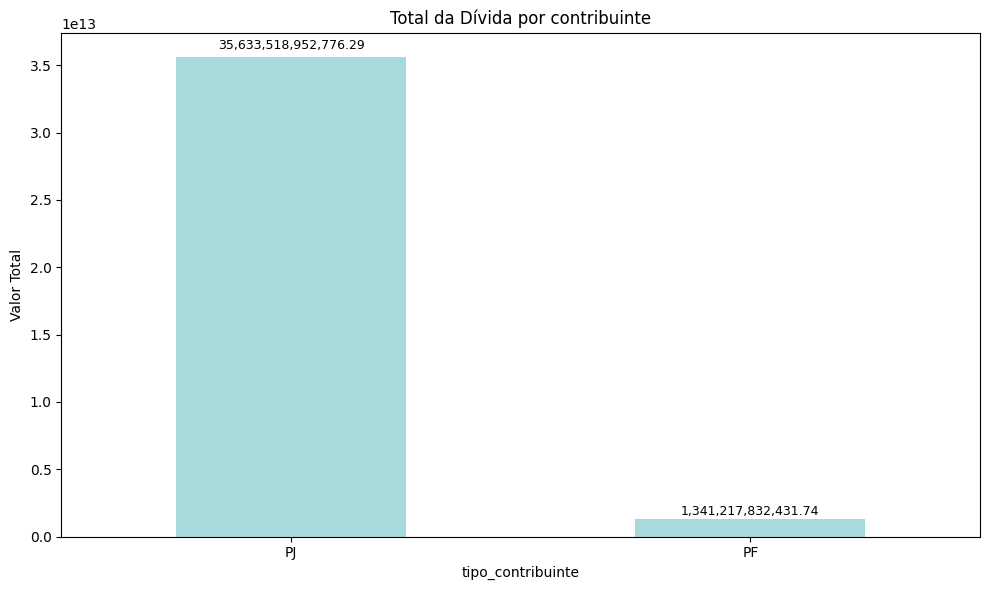

In [ ]:
ax = soma_total_contribuinte.plot(kind='bar', color=paleta_cores_suaves['Azul_claro'], figsize=(10,6))
plt.title('Total da Dívida por contribuinte')
plt.ylabel('Valor Total')
plt.xticks(rotation=None)

for i, valor in enumerate(soma_total_contribuinte):
  plt.text(i, valor + valor * 0.01, f'{valor:,.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Com o grafico acima podemos ver tanto o valor das dívidas PJ quanto PF**

*PJ chegando a somar mais de 53 **trilhões** de reais*

*PF chegando a somar mais de 1 **trilhão** de reais*

In [ ]:
soma_total_situacao = df.groupby('situacao')['vl_total'].sum().sort_values(ascending=False)

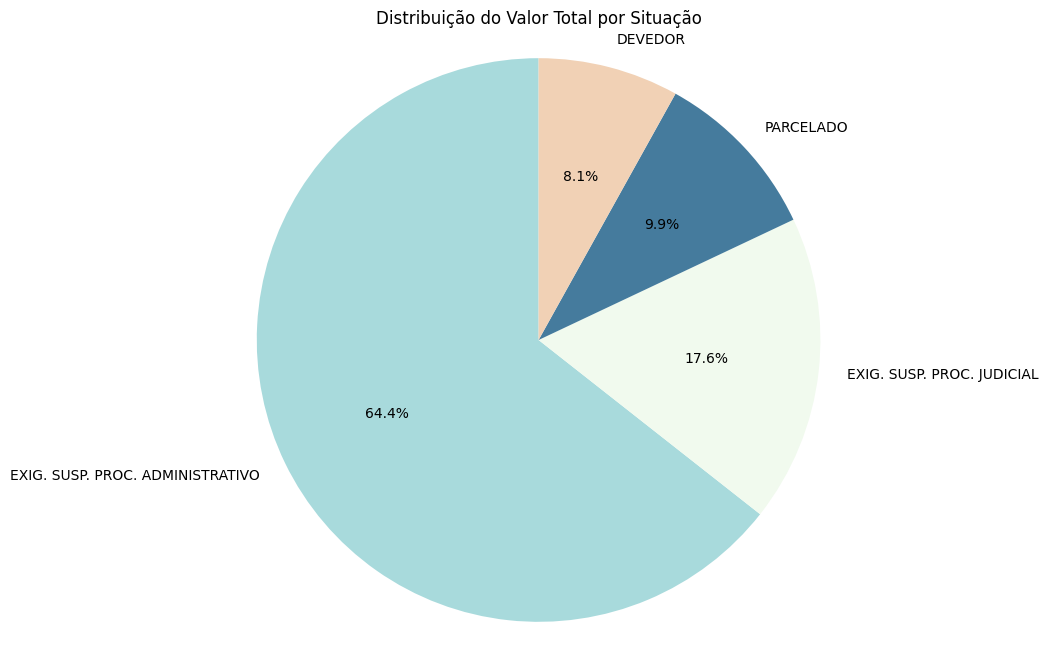

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(
    soma_total_situacao,
    labels=soma_total_situacao.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta_cores_suaves.values()
)

plt.title('Distribuição do Valor Total por Situação')
plt.axis('equal')
plt.show()

Podemos que o EXIG. SUSP. PROC. ADMINISTRATIVO (Exigibilidade Suspensa por Processo Administrativo) domina com pouco mais de 64%.

**são Créditos tributários cujos valores e
exigibilidades estão em discussão na esfera administrativa.**

 EXIG. SUSP. PROC. JUDICIAL:

 Exigibilidade Suspensa por Processo Judicial.

 **Créditos tributários cujos valores e exigibilidades
estão em discussão na esfera judicial**

In [ ]:
df.columns

Index(['ano_mes', 'situacao', 'tipo_contribuinte', 'uf', 'grupo_tributo',
       'vl_total'],
      dtype='object')

In [ ]:
df['ano_mes'] = pd.to_datetime(df['ano_mes'], format='%Y-%m')

In [ ]:
soma_por_mes = df.groupby('ano_mes')['vl_total'].sum().sort_index()

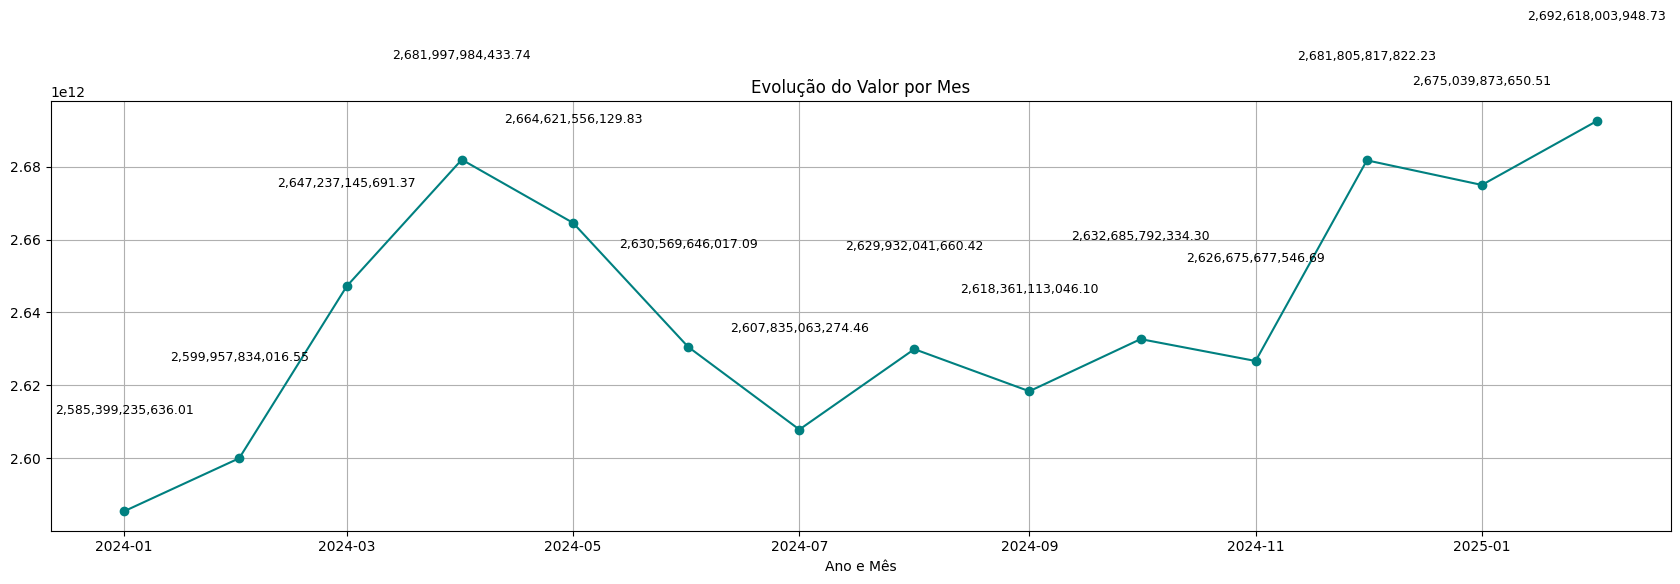

In [ ]:
plt.figure(figsize=(17,6))
plt.plot(soma_por_mes.index, soma_por_mes.values, marker='o', color='teal')
plt.title('Evolução do Valor por Mes')
plt.xlabel('Ano e Mês')
plt.xticks(rotation=None)
plt.grid(True)

for i, valor in enumerate(soma_por_mes.values):
  plt.text(soma_por_mes.index[i], valor + valor * 0.01, f'{valor:,.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**O gráfico mostra a evolução de Janeiro de 2024 à Janeiro de 2025**

In [ ]:
soma_por_estado = df.groupby('uf')['vl_total'].sum()
limite = 1_000_000_000_000
# o limite é por conta da quantidade de estados com poucos valores de dívidas que tornaria o gráfico ilegível

In [ ]:
soma_por_estado_agrupado = soma_por_estado[soma_por_estado >= limite]
soma_por_estado_agrupado.loc['Outros'] = soma_por_estado[soma_por_estado < limite].sum()

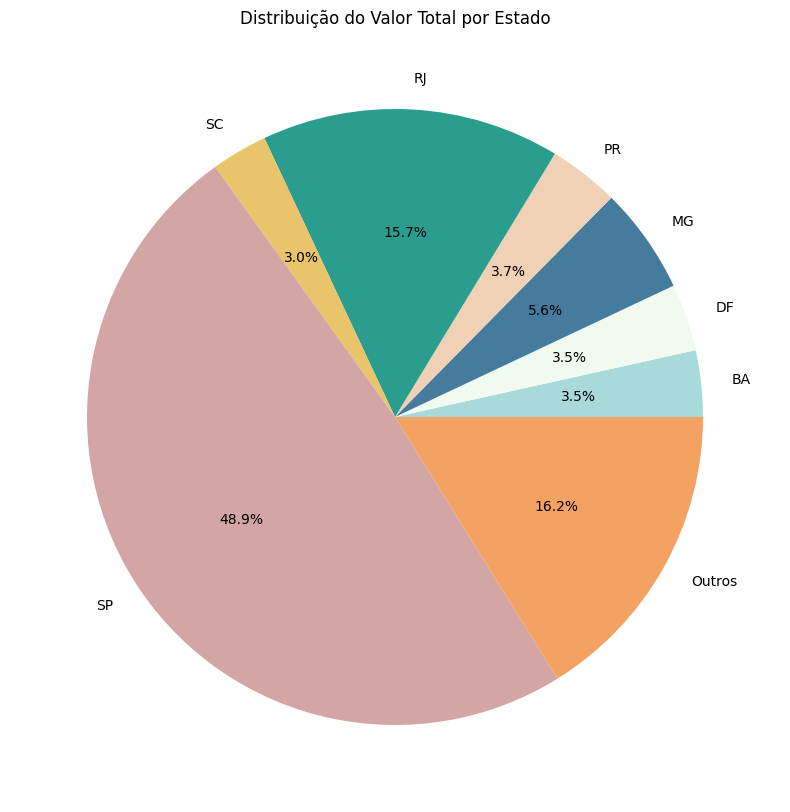

In [ ]:
cores = list(paleta_cores_suaves.values())[:len(soma_por_estado_agrupado)]
plt.figure(figsize=(10,10))
plt.pie(
    soma_por_estado_agrupado,
    labels= soma_por_estado_agrupado.index,
    autopct= '%1.1f%%',
    colors=cores
)

plt.title('Distribuição do Valor Total por Estado')
plt.show()

A quantidade de endividados no país se contentram mais em São Paulo com quase 50% do total

In [ ]:
soma_por_grupo = df.groupby('grupo_tributo')['vl_total'].sum().sort_values(ascending=False)

<ipython-input-96-e3f7935503dd>:4: UserWarning: 
The palette list has fewer values (16) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=soma_por_grupo.values, y=soma_por_grupo.index, palette=cores, hue=soma_por_grupo.index)


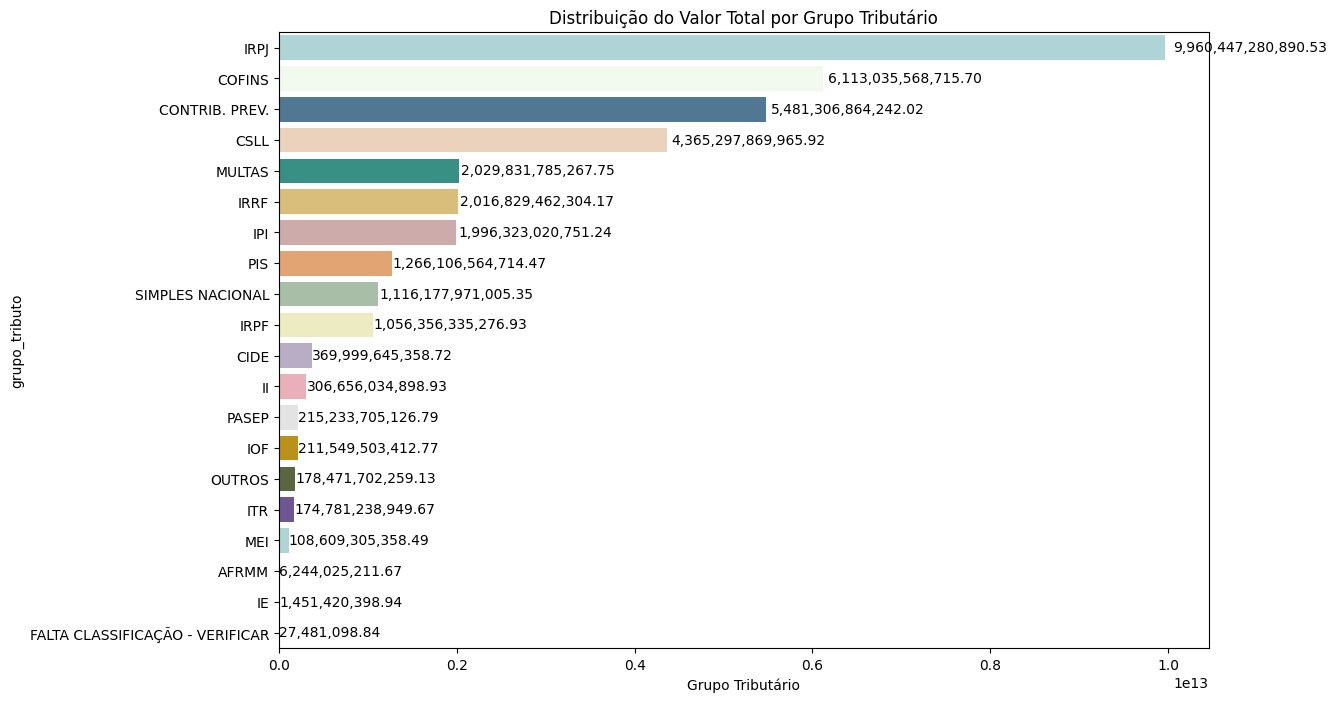

In [ ]:
plt.figure(figsize=(12,8))
cores = list(paleta_cores_suaves.values())[:len(soma_por_grupo)]

sns.barplot(x=soma_por_grupo.values, y=soma_por_grupo.index, palette=cores, hue=soma_por_grupo.index)

for i, valor in enumerate(soma_por_grupo.values):
  plt.text(valor + valor * 0.01, i, f'{valor:,.2f}', va='center', fontsize=10, color='black')

plt.title('Distribuição do Valor Total por Grupo Tributário')
plt.xlabel('Grupo Tributário')

plt.tight_layout
plt.show()

Podemos ver que a maior parte dos endividados fazem parte do grupo IRPJ – Imposto de Renda da Pessoa Jurídica

In [ ]:
df['vl_total'].sum()

np.float64(36974736785208.04)

Com a Base de Dados, tivemos acesso aos dados de dívidas divididas por pessoas como PJ e PF, vimos que o total da dívida de Janeiro de 2024 a Janeiro de 2025 chegam a 36 trilhões de reais. com 35 trilhões ficando com PJ e 1 trilhão com PF

IRPJ é o grupo tributário que mais tem endividados com mais de 9 TRILHÕES de reais

SP ldiera o Ranking como o estado em que se concentram  as pessoas com dívidas, chegando a quase 50% logo em seguida vem o RJ com 15.7%

Ou seja, o segundo colocando no ranking não chega nem na metade das dívidas do primeiro colocado

O pico do número de dívidas é recente, no final de Janeiro de 2025 chegando a 2.6 trilhões de reais